Импортирование библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from russian_names import russian_names

Подключение данных

In [3]:
# Автоматическая выгрузка из Kaggle
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("thedevastator/higher-education-predictors-of-student-retention")

print("Путь к файлу:", path)

Путь к файлу: C:\Users\1\.cache\kagglehub\datasets\thedevastator\higher-education-predictors-of-student-retention\versions\2


In [4]:
# Проверка корректности пути
print(os.listdir(path))

['dataset.csv']


In [5]:
# Создание полного пути к файлу и выгрузка в DataFrame
file_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(file_path)

In [6]:
df_copy = df.copy()

In [7]:
df_copy

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Обзор данных

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

### Анализ целевой переменной

In [9]:
df_copy['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Text(0, 0.5, 'Количество студентов')

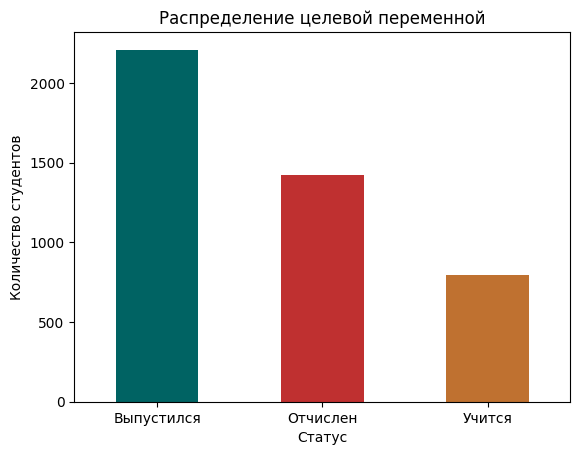

In [10]:
# Словарь русских наименований классов для визуализации
name_map = {'Dropout':'Отчислен', 'Graduate':'Выпустился', 'Enrolled':'Учится'}

# Отрисовка графика
df_copy['Target'].map(name_map).value_counts().plot(kind='bar', 
                                                    color=['#006363', '#BF3030', '#BF7130'],
                                                    rot = 0)
plt.title('Распределение целевой переменной')
plt.xlabel('Статус')
plt.ylabel('Количество студентов')

#### Анализ класса enrolled

In [11]:
# Переименование колонок для удобства
df_copy = df.rename(columns={'Curricular units 1st sem (credited)': 'Units 1 credited', 
                             'Curricular units 1st sem (enrolled)': 'Units 1 enrolled',
                             'Curricular units 1st sem (evaluations)': 'Units 1 evaluations', 
                             'Curricular units 1st sem (approved)': 'Units 1 approved', 
                             'Curricular units 1st sem (grade)': 'Units 1 grade',
                             'Curricular units 1st sem (without evaluations)': 'Units 1 non_eval', 
                             'Curricular units 2nd sem (credited)': 'Units 2 credited', 
                             'Curricular units 2nd sem (enrolled)': 'Units 2 enrolled',
                             'Curricular units 2nd sem (evaluations)': 'Units 2 evaluations', 
                             'Curricular units 2nd sem (approved)': 'Units 2 approved',
                             'Curricular units 2nd sem (grade)': 'Units 2 grade',
                             'Curricular units 2nd sem (without evaluations)': 'Units 2 non_eval'})

In [12]:
grade_columns = ['Units 1 credited', 'Units 1 enrolled', 'Units 1 evaluations', 'Units 1 approved', 
                 'Units 1 grade', 'Units 1 non_eval', 'Units 2 credited', 'Units 2 enrolled', 
                 'Units 2 evaluations', 'Units 2 approved', 'Units 2 grade', 'Units 2 non_eval']

In [13]:
# Статистика оценок первого семестра
df_copy.groupby('Target')['Units 1 grade'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Dropout,1421.0,7.256656,6.031120,0.0,0.000000,10.928571,12.200000,18.000
Enrolled,794.0,11.125257,3.675084,0.0,11.000000,12.000000,12.857143,17.000
Graduate,2209.0,12.643655,2.699027,0.0,12.121429,13.000000,13.857143,18.875


In [14]:
# Статистика оценок второго семестра
df_copy.groupby('Target')['Units 2 grade'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
Dropout,1421.0,5.899339,6.118740,0.0,0.000000,0.0,11.833333,17.714286
Enrolled,794.0,11.117364,3.601240,0.0,11.000000,12.0,12.818182,17.600000
Graduate,2209.0,12.697276,2.685608,0.0,12.166667,13.0,14.000000,18.571429


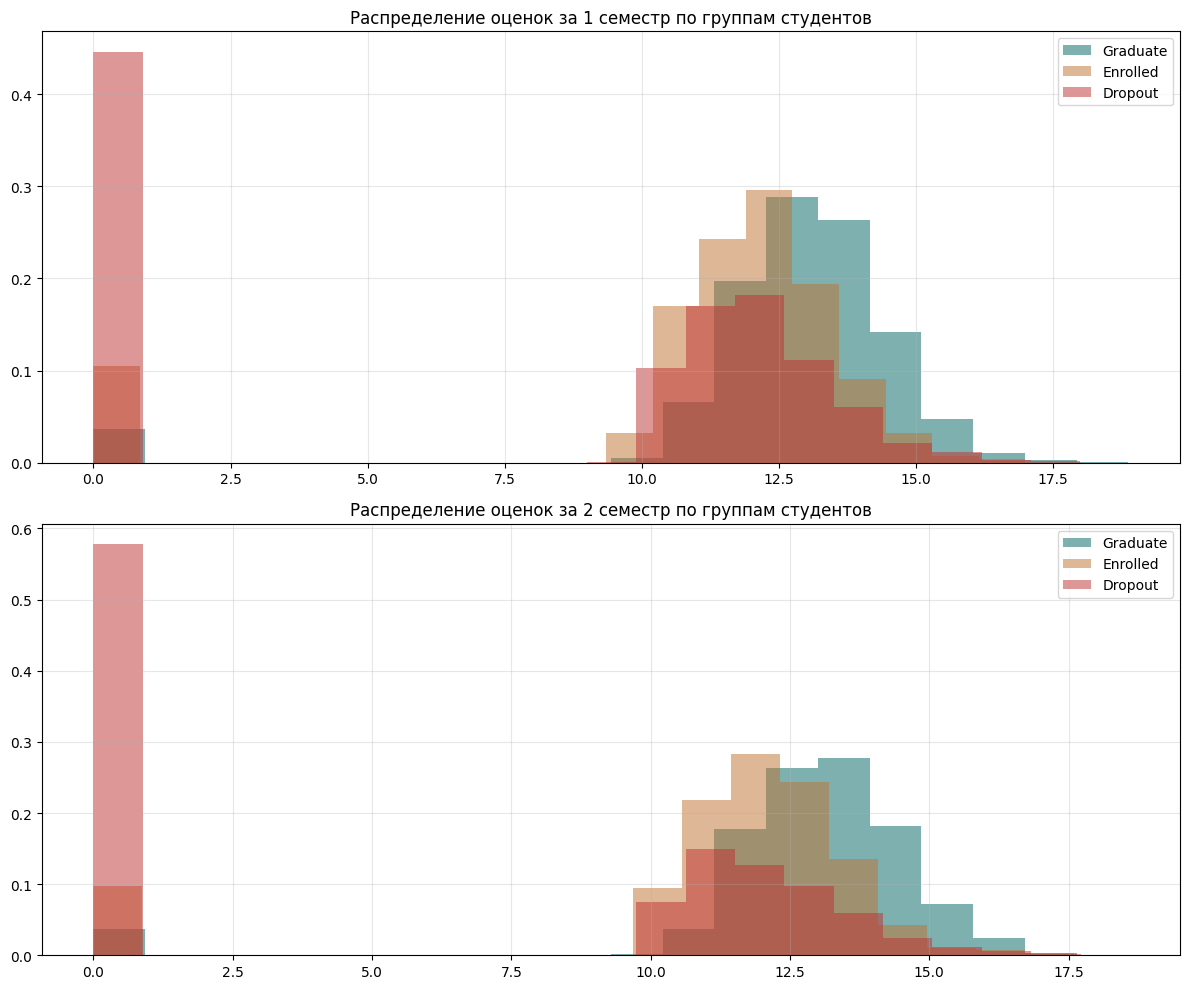

In [15]:
plt.figure(figsize=(12,10))

target = ['Graduate', 'Enrolled', 'Dropout']
color = ['#006363', '#BF7130', '#BF3030']

plt.subplot(2, 1, 1)
for a, b in zip(target, color):
    grades = df_copy[df_copy['Target'] == a]['Units 1 grade']
    plt.hist(grades, bins=20, color=b, alpha=0.5, density=1, label=a)

plt.grid(alpha=0.3)
plt.title('Распределение оценок за 1 семестр по группам студентов')
plt.legend()

plt.subplot(2, 1, 2)
for a, b in zip(target, color):
    grades = df_copy[df_copy['Target'] == a]['Units 2 grade']
    plt.hist(grades, bins=20, color=b, alpha=0.5, density=1, label=a)

plt.grid(alpha=0.3)
plt.title('Распределение оценок за 2 семестр по группам студентов')
plt.legend()
plt.tight_layout()

По статистике и графикам видно, что группа учащихся (enrolled) находится гораздо ближе к выпустившимся (graduate), чем к отчисленным (dropout). Таким образом, принято решение объединить группы учащихся и выпустившихся. Дальнейший анализ проводить по группам: отчисленные и неотчисленные. 

In [16]:
# Объединение классов и приведение к числовым значениям
target_map = {'Dropout': 1, 'Enrolled': 0, 'Graduate': 0}
df_copy['Target'] = df_copy['Target'].map(target_map)

In [17]:
# Проверка корректности класссов
df_copy['Target'].value_counts()

Target
0    3003
1    1421
Name: count, dtype: int64

### Корреляция признаков

#### Числовые переменные

In [18]:
# Список числовых колонок 
numeric = ['Application order', 'Age at enrollment', 'Units 1 credited', 'Units 1 enrolled', 
           'Units 1 evaluations', 'Units 1 approved', 'Units 1 grade', 'Units 1 non_eval', 
           'Units 2 credited', 'Units 2 enrolled', 'Units 2 evaluations', 'Units 2 approved', 
           'Units 2 grade', 'Units 2 non_eval', 'Unemployment rate', 'Inflation rate', 'GDP']

# Загрузка нормализатора
scaler = MinMaxScaler()
# Масштабирование
df_copy[numeric] = scaler.fit_transform(df_copy[numeric])

In [19]:
# Проверка
df_copy[numeric].agg(['min', 'max'])

,Application order,Age at enrollment,Units 1 credited,Units 1 enrolled,Units 1 evaluations,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Unemployment rate,Inflation rate,GDP
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
# Добавление к списку числовых признаков целевой переменной
corr_columns = numeric + ['Target']
# Матрица корреляции
corr_matrix = df_copy[corr_columns].corr()

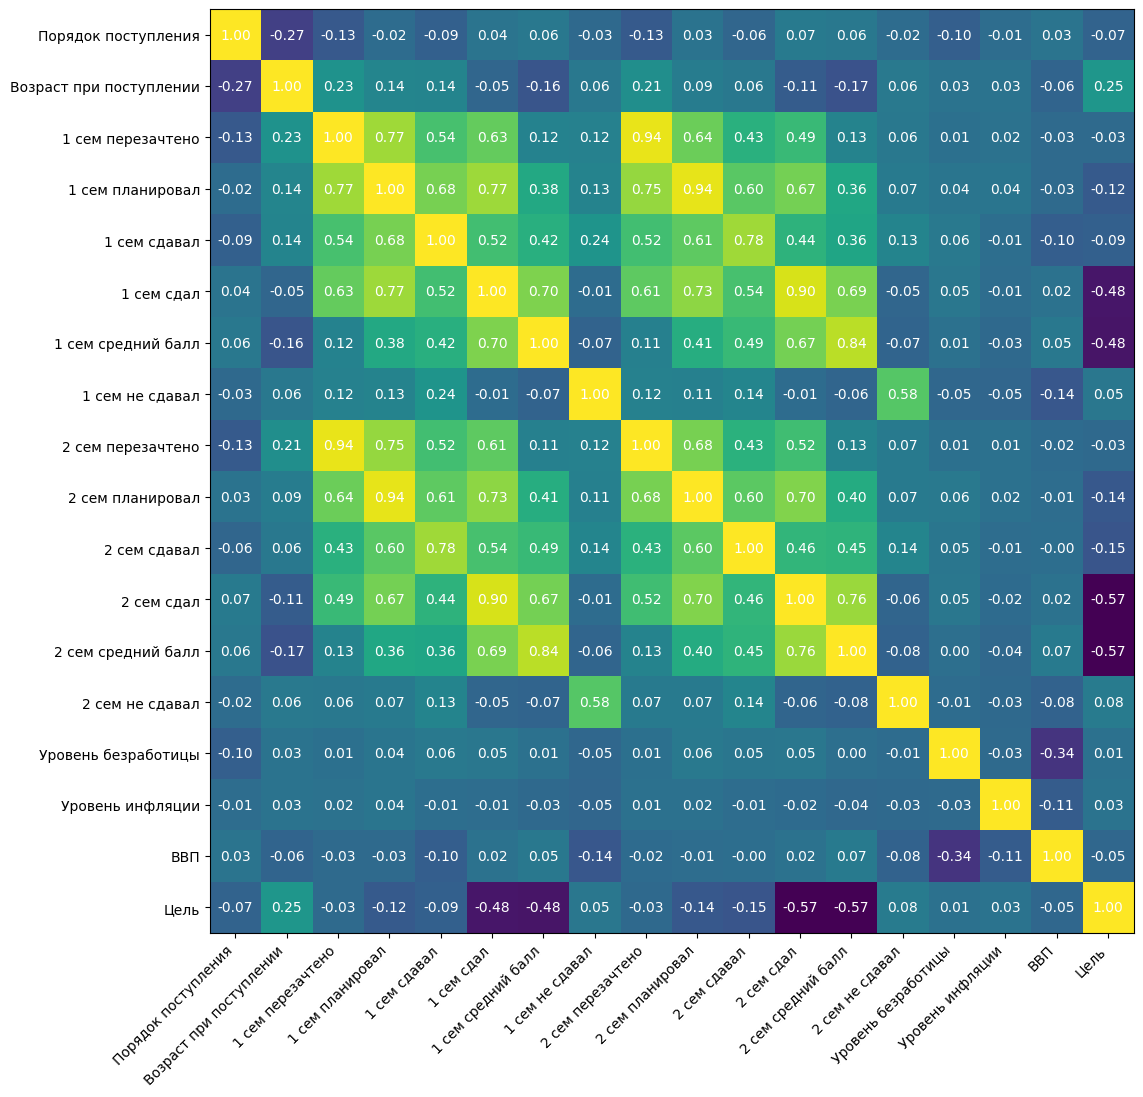

In [21]:
# Визуализция тепловой карты
plt.figure(figsize=(12,12))
plt.imshow(corr_matrix)
# Берем русские названия колонок из словаря-переводчика:
labels = [russian_names[column] for column in corr_matrix.columns]
plt.xticks(np.arange(len(labels)), labels, rotation=45, ha='right')
plt.yticks(np.arange(len(labels)), labels)
for (i, j), val in np.ndenumerate(corr_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')

#### Категориальные переменные

In [22]:
df_copy.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Units 1 credited', 'Units 1 enrolled', 'Units 1 evaluations',
       'Units 1 approved', 'Units 1 grade', 'Units 1 non_eval',
       'Units 2 credited', 'Units 2 enrolled', 'Units 2 evaluations',
       'Units 2 approved', 'Units 2 grade', 'Units 2 non_eval',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [23]:
df_copy['Marital status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [24]:
# Добавляем элементы из списка всех колонок если их нет в списке numeric
categorial = [x for x in list(df_copy.columns) if x not in numeric]
# и выводим список категориальных переменных
categorial

['Marital status',
 'Application mode',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International',
 'Target']

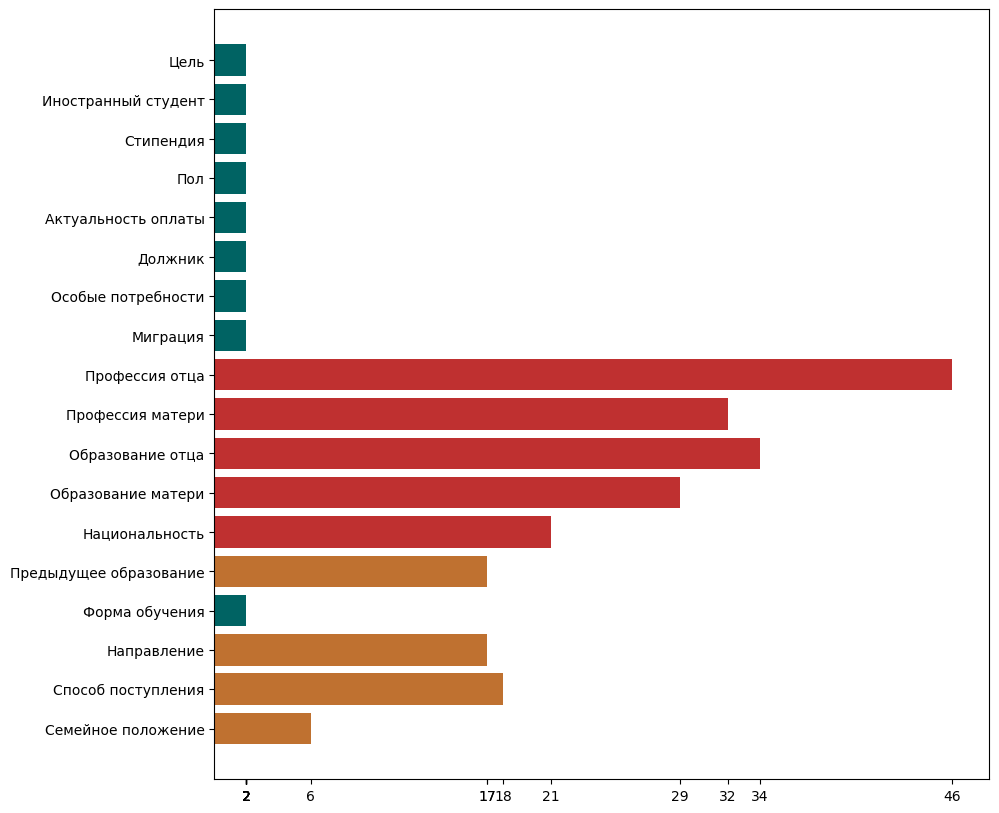

In [25]:
# Списки для осей графика
names = []
counts = []

# Заполнение списков
for i in categorial:
    names.append(russian_names[i])
    counts.append(df_copy[i].nunique())

# Карта цветовых обозначений по количеству
if_color = ['#006363' if count == 2 
            else '#BF7130' if count < 20  
            else '#BF3030' for count in counts]

# Построение графика
plt.figure(figsize=(10,10))
plt.barh(names, counts, color=if_color)
plt.xticks(counts)
plt.show()

Необходимо уменьшить количество уникальных в колонках, где их слишком много. 

##### Application mode

In [26]:
df_copy['Application mode'].value_counts()

Application mode
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: count, dtype: int64

In [27]:
# Объединить в "другое" колонки с менее чем 1% студентов (категория "Другое")
small_app_mode = [7, 17, 6, 3, 5, 2, 18, 10, 11]
df_copy['Application mode'] = df_copy['Application mode'].replace(small_app_mode, 2)
df_copy['Application mode'].value_counts()

Application mode
1     1708
8      872
12     785
14     312
15     213
4      139
2      135
9      124
13      77
16      59
Name: count, dtype: int64

In [28]:
df_copy['Course'].value_counts()

Course
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: count, dtype: int64

In [29]:
df_copy["Mother's qualification"].value_counts()

Mother's qualification
1     1069
22    1009
13     953
23     562
3      438
19     130
2       83
4       49
10      42
5       21
25       9
7        8
24       8
26       6
6        4
27       4
28       4
17       3
8        3
9        3
21       3
20       3
18       3
11       2
12       1
14       1
16       1
15       1
29       1
Name: count, dtype: int64

In [30]:
# Функция для упрощения создания исправленных категорий (экономия времени)
# принимает название колонки (str) и пороговое значение (int)
def smaller_categories(cat, limit):
    small_list = []
    value = df_copy[cat].value_counts()
    # в каждой категории считает количество студентов
    for category, count in value.items():
        # если меньше порога - добавляет в список
        if count < limit:
            small_list.append(category)
    return small_list

In [31]:
# Выводим список для просмотра и дальнейшей замены
small_mom_qual = smaller_categories("Mother's qualification", 40)
print(small_mom_qual)

[5, 25, 7, 24, 26, 6, 27, 28, 17, 8, 9, 21, 20, 18, 11, 12, 14, 16, 15, 29]


In [32]:
# Объединяем категории и проверяем результат
df_copy["Mother's qualification"] = df_copy["Mother's qualification"].replace(small_mom_qual, 5)
df_copy["Mother's qualification"].value_counts()

Mother's qualification
1     1069
22    1009
13     953
23     562
3      438
19     130
5       89
2       83
4       49
10      42
Name: count, dtype: int64

Аналогично поступаем с другими "шумными" колонками. 

In [33]:
df_copy["Father's qualification"].value_counts()

Father's qualification
27    1209
14     968
1      904
28     702
3      282
24     112
2       68
4       39
10      38
29      20
5       18
9       10
26       8
7        5
30       5
16       4
21       4
12       4
20       3
25       2
31       2
33       2
8        2
6        2
18       2
17       1
19       1
23       1
34       1
15       1
32       1
13       1
11       1
22       1
Name: count, dtype: int64

In [34]:
small_dad_qual = smaller_categories("Father's qualification", 40)
print(small_dad_qual)

[4, 10, 29, 5, 9, 26, 7, 30, 16, 21, 12, 20, 25, 31, 33, 8, 6, 18, 17, 19, 23, 34, 15, 32, 13, 11, 22]


In [35]:
df_copy["Father's qualification"] = df_copy["Father's qualification"].replace(small_dad_qual, 4)
df_copy["Father's qualification"].value_counts()

Father's qualification
27    1209
14     968
1      904
28     702
3      282
4      179
24     112
2       68
Name: count, dtype: int64

In [36]:
df_copy["Mother's occupation"].value_counts()

Mother's occupation
10    1577
5      817
6      530
4      351
3      318
8      272
1      144
2      102
7       91
12      70
9       36
29      26
13      17
32      11
20       8
15       7
22       6
28       5
30       5
31       4
19       4
11       4
21       3
23       3
18       3
24       2
14       2
25       2
27       1
16       1
17       1
26       1
Name: count, dtype: int64

In [37]:
small_mom_ocup = smaller_categories("Mother's occupation", 40)
print(small_mom_ocup)

[9, 29, 13, 32, 20, 15, 22, 28, 30, 31, 19, 11, 21, 23, 18, 24, 14, 25, 27, 16, 17, 26]


In [38]:
df_copy["Mother's occupation"] = df_copy["Mother's occupation"].replace(small_mom_ocup, 9)
df_copy["Mother's occupation"].value_counts()

Mother's occupation
10    1577
5      817
6      530
4      351
3      318
8      272
9      152
1      144
2      102
7       91
12      70
Name: count, dtype: int64

In [39]:
df_copy["Father's occupation"].value_counts()

Father's occupation
10    1010
8      666
6      516
5      386
4      384
9      318
11     266
7      242
3      197
2      134
1      128
12      65
13      19
44      15
29       8
36       8
43       6
35       5
16       4
39       4
26       3
42       3
31       3
21       3
40       3
45       2
41       2
17       2
30       2
37       2
20       2
15       2
32       1
14       1
18       1
38       1
27       1
24       1
25       1
28       1
23       1
34       1
46       1
19       1
22       1
33       1
Name: count, dtype: int64

In [40]:
small_dad_ocup = smaller_categories("Father's occupation", 40)
print(small_dad_ocup)

[13, 44, 29, 36, 43, 35, 16, 39, 26, 42, 31, 21, 40, 45, 41, 17, 30, 37, 20, 15, 32, 14, 18, 38, 27, 24, 25, 28, 23, 34, 46, 19, 22, 33]


In [41]:
df_copy["Father's occupation"] = df_copy["Father's occupation"].replace(small_dad_ocup, 13)
df_copy["Father's occupation"].value_counts()

Father's occupation
10    1010
8      666
6      516
5      386
4      384
9      318
11     266
7      242
3      197
2      134
1      128
13     112
12      65
Name: count, dtype: int64

In [42]:
df_copy['Nacionality'].value_counts()

Nacionality
1     4314
14      38
12      14
9       13
3       13
10       5
16       3
4        3
18       3
8        2
17       2
15       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: count, dtype: int64

In [43]:
nation = smaller_categories('Nacionality', 40)
print(nation)

[14, 12, 9, 3, 10, 16, 4, 18, 8, 17, 15, 11, 2, 19, 13, 5, 21, 20, 6, 7]


In [44]:
df_copy['Nacionality'] = df_copy['Nacionality'].replace(nation, 14)
df_copy['Nacionality'].value_counts()

Nacionality
1     4314
14     110
Name: count, dtype: int64

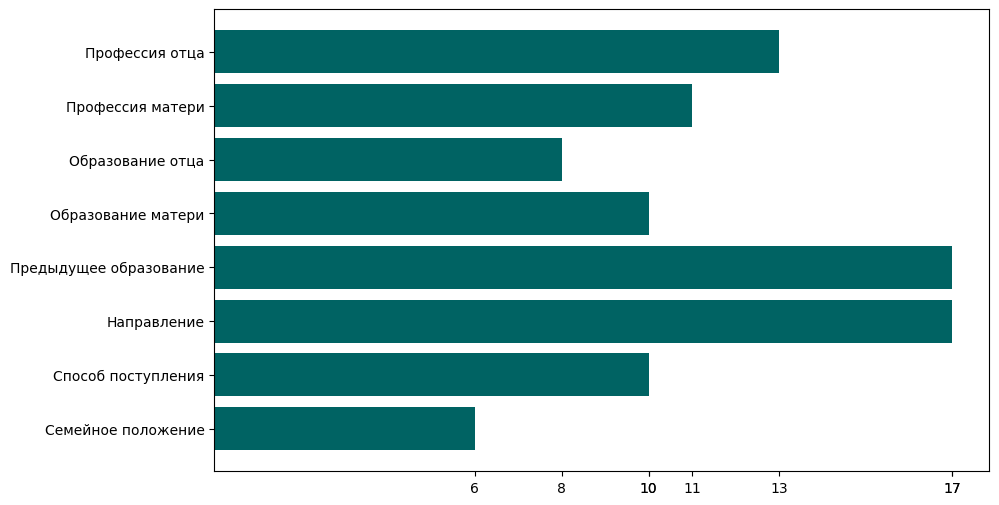

In [45]:
# Список только небинарных
new_categorial = ['Marital status','Application mode','Course', 'Previous qualification',
                  "Mother's qualification", "Father's qualification", "Mother's occupation",
                  "Father's occupation"]
new_counts = []
new_name = []

# Заполнение списка количества катгорий
for i in new_categorial:
    new_name.append(russian_names[i])
    new_counts.append(df_copy[i].nunique())

# Построение графика
plt.figure(figsize=(10,6))
plt.barh(new_name, new_counts, color='#006363')
plt.xticks(new_counts)
plt.show()

Для анализа корреляции категориальных признаков исползуем метод V Крамера

In [46]:
# Принимает 2 колонки x и y (категориальные)
def cramer_v(x, y):
    # Создание таблицы
    matrix = pd.crosstab(x, y)
    # Расчет хи-квадрат
    chi2 = chi2_contingency(matrix)[0]
    # Сумма всех наблюдений
    n = matrix.sum().sum()
    # Расчет фи-квадрат
    phi2 = chi2 / n
    # Размеры таблицы
    r, k = matrix.shape
    # Результат - клэффициент, рассчитанный по формуле
    return np.sqrt(phi2 / min(k-1, r-1))

In [55]:
# Список небинарных категориальных
categorial_cols = ['Marital status', 'Course', 'Previous qualification',
                   "Mother's qualification", "Father's qualification", 
                   "Mother's occupation", "Father's occupation", 'Application mode']
corr_list = []
# Применение коэффициента Крамера для каждого признака и целевой переменной
for column in categorial_cols:
    corr = cramer_v(df_copy[column], df_copy['Target'])
    corr_list.append(corr)
    print(f'{russian_names[column]}: {corr:.3f}') # вывод результата

Семейное положение: 0.116
Направление: 0.260
Предыдущее образование: 0.214
Образование матери: 0.197
Образование отца: 0.179
Профессия матери: 0.189
Профессия отца: 0.174
Способ поступления: 0.296


<BarContainer object of 8 artists>

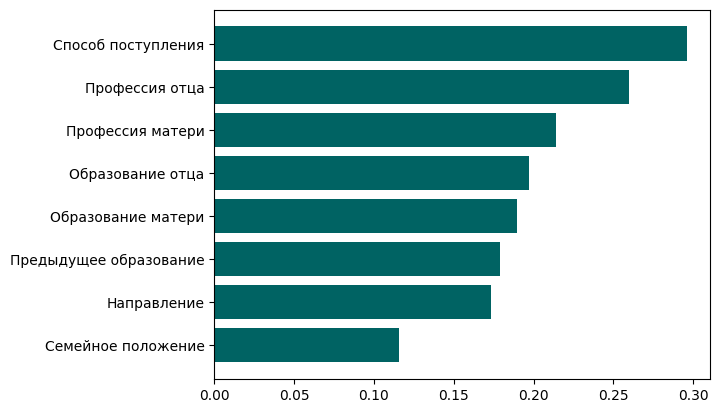

In [62]:
corr_list = sorted(corr_list)
russian_labels = [russian_names[col] for col in categorial_cols]

plt.barh(russian_labels, corr_list, color='#006363')

Для бинарных: фи-коэффициент (можно взять из хи-квадрат)

In [63]:
binary = ['Daytime/evening attendance', 'Nacionality',
          'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
          'Gender', 'Scholarship holder', 'International']

In [64]:
def phi_coef(x, y):
    # Создаем таблицу
    matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    # возвращает фи, вычисленное из хи-квадрат
    return np.sqrt(chi2 / n)

corr_bin_list = []
for column in binary:
    corr = phi_coef(df_copy[column], df_copy['Target'])
    corr_bin_list.append(corr)
    print(f'{russian_names[column]}: {corr:.3f}') # вывод результата

Форма обучения: 0.080
Национальность: 0.009
Миграция: 0.107
Особые потребности: 0.001
Должник: 0.229
Актуальность оплаты: 0.428
Пол: 0.203
Стипендия: 0.245
Иностранный студент: 0.009


In [69]:
corr_bin_list = []
problem_cols = []

for column in binary:
    try:
        corr = phi_coef(df_copy[column], df_copy['Target'])
        corr_bin_list.append(corr)
        print(f'{russian_names[column]}: {corr:.3f}')
    except Exception as e:
        print(f"ОШИБКА для {column}: {e}")
        problem_cols.append(column)

print(f"Собрано значений: {len(corr_bin_list)}")
print(f"Проблемные колонки: {problem_cols}")

Форма обучения: 0.080
Национальность: 0.009
Миграция: 0.107
Особые потребности: 0.001
Должник: 0.229
Актуальность оплаты: 0.428
Пол: 0.203
Стипендия: 0.245
Иностранный студент: 0.009
Собрано значений: 9
Проблемные колонки: []


<BarContainer object of 9 artists>

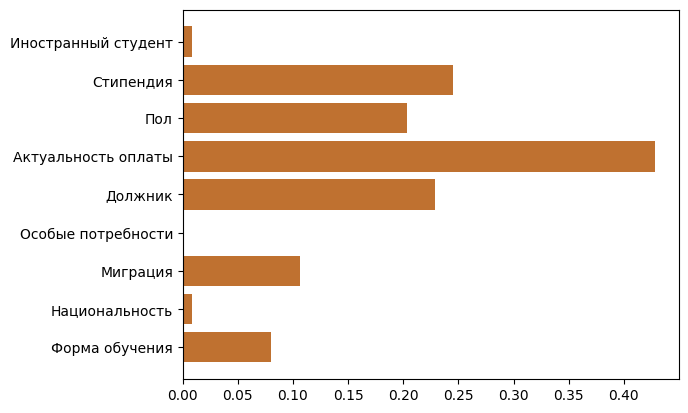

In [70]:

rus_bin_labels = [russian_names[col] for col in binary]

plt.barh(rus_bin_labels, corr_bin_list, color='#BF7130')

In [53]:
df_copy.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Units 1 credited', 'Units 1 enrolled', 'Units 1 evaluations',
       'Units 1 approved', 'Units 1 grade', 'Units 1 non_eval',
       'Units 2 credited', 'Units 2 enrolled', 'Units 2 evaluations',
       'Units 2 approved', 'Units 2 grade', 'Units 2 non_eval',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [54]:
# Убираем точно бесполезные признаки
cols_to_drop = ['Educational special needs', 'International', 'Daytime/evening attendance',
                'Nacionality', 'GDP', 'Inflation rate', 'Unemployment rate']

df_processed = df_copy.drop(columns=cols_to_drop)
df_processed.head(10)

,Marital status,Application mode,Application order,Course,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,...,Units 1 approved,Units 1 grade,Units 1 non_eval,Units 2 credited,Units 2 enrolled,Units 2 evaluations,Units 2 approved,Units 2 grade,Units 2 non_eval,Target
0,1,8,0.555556,2,1,13,4,6,10,1,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,1
1,1,2,0.111111,11,1,1,3,4,4,1,...,0.230769,0.741722,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.000000,0
2,1,1,0.555556,5,1,22,27,10,10,1,...,0.000000,0.000000,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.000000,1
3,1,8,0.222222,15,1,23,27,6,4,1,...,0.230769,0.711447,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.000000,0
4,2,12,0.111111,3,1,22,28,10,10,0,...,0.192308,0.653422,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.000000,0
5,2,12,0.111111,17,12,22,27,10,8,0,...,0.192308,0.628193,0.0,0.0,0.217391,0.515152,0.25,0.619231,0.416667,0
6,1,1,0.111111,12,1,13,28,8,11,1,...,0.269231,0.704636,0.0,0.0,0.347826,0.242424,0.40,0.772423,0.000000,0
7,1,9,0.444444,11,1,22,27,10,10,1,...,0.000000,0.000000,0.0,0.0,0.217391,0.151515,0.00,0.000000,0.000000,1
8,1,1,0.333333,10,1,1,1,10,10,0,...,0.230769,0.735099,0.0,0.0,0.260870,0.212121,0.30,0.761538,0.000000,0
9,1,1,0.111111,10,1,1,14,5,8,1,...,0.192308,0.603974,0.0,0.0,0.260870,0.424242,0.10,0.726923,0.000000,1


In [56]:
df_processed.to_csv('../datasets/data_processed.csv')